In [41]:
import os, random, cv2
import matplotlib.pyplot as plt
import numpy as np

CAPTCHA_FOLDER = "captcha/"
PROCESSED_FOLDER = "processed/"

filename = random.choice(os.listdir(CAPTCHA_FOLDER))
img = cv2.imread(CAPTCHA_FOLDER + filename)

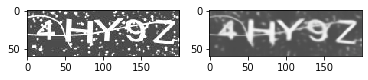

In [42]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

In [43]:
kernel = np.ones((4,4), np.uint8) 
erosion = cv2.erode(dst, kernel, iterations=1)
burred = cv2.GaussianBlur(erosion, (5, 5), 0)
edged = cv2.Canny(burred, 30, 150)
dilation = cv2.dilate(edged, kernel, iterations=1) 

#plt.imshow(dilation)
cv2.imwrite(PROCESSED_FOLDER + filename, dilation)

True